# Teoria da Busca - RPG Game (Cega e Heuristica)

In [2]:
# Importação de bibliotecas
import networkx as nx
import matplotlib.pyplot as plt
from collections import deque
import heapq

In [3]:
# Criar os grafos
G_game = nx.Graph()

# Localizações do mapa (grafo)
locais = {
    "Castelo do Herói": (50,400),
    "Vila dos Elfos": (70,80),
    "Fortaleza dos Nativos": (90, 120),
    "Ilha de Woompa": (105, 85),
    "Floresta dos Desafios": (120, 130),
    "Laboratório do Iceberg": (140, 50),
    "Cidade de Lavender": (150, 120),
    "O Grande Salão": (180, 200),
    "Corte do Rei Carmesim": (200, 230),
    "Academia do Mal": (225, 300),
    "Caverna da Bruxa": (300, 400)
}

# Conexões entre os nós (arestas)
G_game.add_edge('Castelo do Herói', 'Vila dos Elfos', weight=10)
G_game.add_edge('Castelo do Herói', 'Fortaleza dos Nativos', weight=12)

G_game.add_edge('Vila dos Elfos', 'Ilha de Woompa', weight=5)
G_game.add_edge('Fortaleza dos Nativos', 'Ilha de Woompa', weight=2)

G_game.add_edge('Ilha de Woompa', 'Floresta dos Desafios', weight=8)

G_game.add_edge('Floresta dos Desafios', 'Laboratório do Iceberg', weight=12)

G_game.add_edge('Laboratório do Iceberg', 'Cidade de Lavender', weight=10)
G_game.add_edge('Laboratório do Iceberg', 'Vila dos Elfos', weight=30)

G_game.add_edge('Cidade de Lavender', 'O Grande Salão', weight=15)

G_game.add_edge('O Grande Salão', 'Corte do Rei Carmesim', weight=8)

G_game.add_edge('Corte do Rei Carmesim', 'Academia do Mal', weight=13)

G_game.add_edge('Academia do Mal', 'Caverna da Bruxa', weight=15)

In [4]:
# Colocando posições no gráfico
for local, pos in locais.items():
    G_game.nodes[local]['pos'] = pos

IndexError: list index out of range

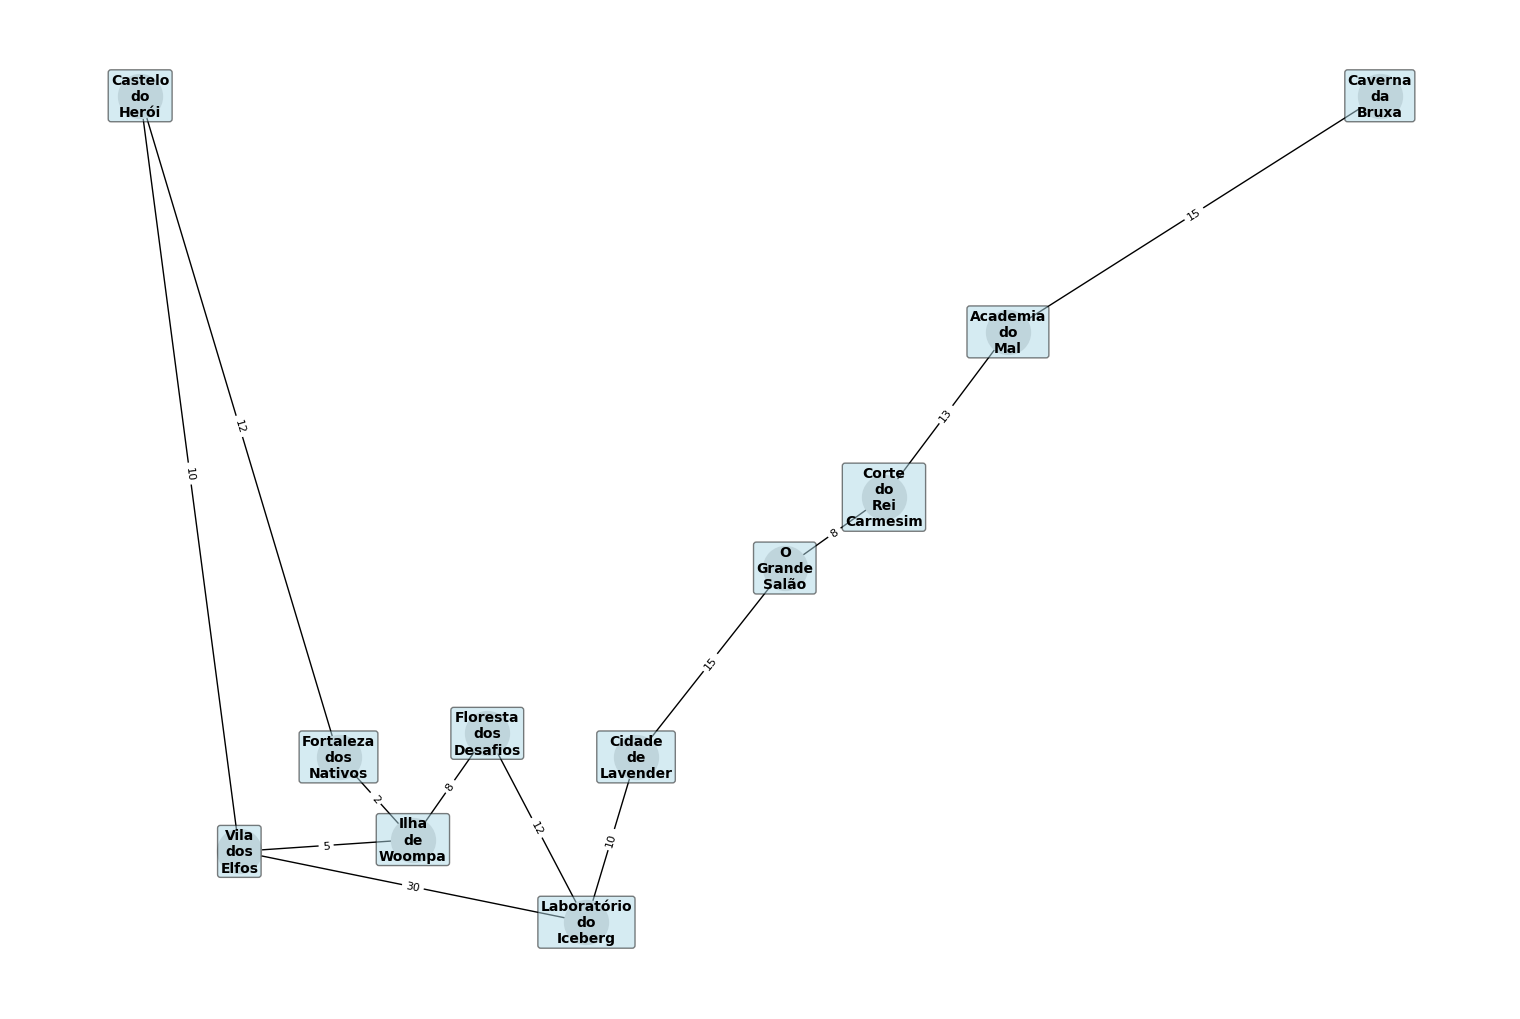

In [ ]:
# Função para plotar o mapa
def plot_map(grafo, caminho_encontrado, titulo='Mapa do Reino'):
    pos = nx.get_node_attributes(grafo, 'pos')
    pesos = nx.get_edge_attributes(grafo, 'weight')

    plt.figure(figsize=(15,10))

    nx.draw(
        grafo, 
        pos, 
        with_labels=True,
        node_size=1000,
        node_color='lightgray',
        font_size=10,
        font_weight='bold',
        labels={node: node.replace(' ', '\n') for node in grafo.nodes()},
        bbox=dict(
            facecolor='lightblue',
            alpha=0.5,
            edgecolor='black',
            boxstyle='round,pad=0.2'
        )
    )
    nx.draw_networkx_edge_labels(grafo, pos, edge_labels=pesos, font_size=8, label_pos=0.5)

    if caminho_encontrado:
        caminho_arestas = list(zip(caminho_encontrado, caminho_encontrado[1:]))
        nx.draw_networkx_nodes(
            grafo,
            pos,
            nodelist=[caminho_arestas[0]],
            node_color='green',
            node_size=500,
            label='Inicio'
        )

        nx.draw_networkx_nodes(
            grafo,
            pos,
            nodelist=[caminho_arestas[-1]],
            node_color='purple',
            node_size=500,
            label='Objetivo'
        )

        nx.draw_networkx_nodes(
            grafo,
            pos,
            nodelist=caminho_encontrado,
            node_color='red',
            node_size=500,
            label='Caminho'
        )

        nx.draw_networkx_edges(
            grafo,
            pos,
            nodelist=caminho_encontrado,
            edge_color='red',
            node_size=500,
            width=3
        )

        plt.text(
            pos[caminho_encontrado[0]][0],
            pos[caminho_encontrado[0]][1] + 30,
            'Inicio',
            fontsize=12,
            ha='center',
            va='center',
            color='green'
        )

        plt.text(
            pos[caminho_encontrado[0]][0],
            pos[caminho_encontrado[0]][1] + 30,
            'Objetivo',
            fontsize=12,
            ha='center',
            va='center',
            color='purple'
        )

    plt.title(titulo)
    plt.axis('off')
    plt.show()

plot_map(G_game, [])